In [1]:
import os
from glob import glob # extract path of each file
import pandas as pd # data preprocessing
from functools import reduce

In [2]:
dfAnno_test = pd.read_csv('/kaggle/input/data-data/test/annotations.csv')
dfAnno_train = pd.read_csv('/kaggle/input/data-data/train/annotations.csv')
dfAnnoBall_test = dfAnno_test[dfAnno_test["class"] == "football"]
dfAnnoBall_train = dfAnno_train[dfAnno_train["class"] == "football"]

In [3]:
dfAnno_test['class'].value_counts()

player      173
football     13
referee       8
Name: class, dtype: int64

In [4]:
dfAnno_train['class'].value_counts()

player      1234
football     100
referee       68
Name: class, dtype: int64

In [5]:
imagesToTrain=dfAnnoBall_train["filename"]
imagesToTest=dfAnnoBall_test["filename"]

In [6]:
imagesTrain = dfAnnoBall_train['filename'].unique()
len(imagesTrain)

100

In [7]:
imagesTest = dfAnnoBall_test['filename'].unique()
len(imagesTest)

13

In [8]:
imagesTrain_df = pd.DataFrame(imagesTrain,columns=['filename'])
img_train = tuple(imagesTrain_df['filename'])

In [9]:
imagesTest_df = pd.DataFrame(imagesTest,columns=['filename'])
img_test = tuple(imagesTest_df['filename'])

In [10]:
len(img_train), len(img_test)

(100, 13)

In [11]:
train_df = dfAnnoBall_train.query(f'filename in {img_train}')
test_df = dfAnnoBall_test.query(f'filename in {img_test}')

In [12]:
# center x, center y
train_df['center_x'] = ((train_df['xmax']+train_df['xmin'])/2)/train_df['width']
train_df['center_y'] = ((train_df['ymax']+train_df['ymin'])/2)/train_df['height']
# w
train_df['w'] = (train_df['xmax']-train_df['xmin'])/train_df['width']
# h
train_df['h'] = (train_df['ymax']-train_df['ymin'])/train_df['height']

In [13]:
train_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,center_x,center_y,w,h
10,yt1s-com---Resume-Liverpool-01-Burnley-Premier...,1280,720,football,408,401,438,431,0.330469,0.577778,0.023438,0.041667
25,1-fps-2_00722_jpeg_jpg.rf.099a2974c597239872e5...,398,224,football,243,75,250,80,0.619347,0.345982,0.017588,0.022321
36,1-fps-2_00045_jpeg_jpg.rf.024d4573e1a8ce924d9e...,398,224,football,95,138,104,147,0.250000,0.636161,0.022613,0.040179
49,1-fps-2_00005_jpeg_jpg.rf.017542df0a9b465349d4...,398,224,football,243,90,250,96,0.619347,0.415179,0.017588,0.026786
57,1-fps-2_00038_jpeg_jpg.rf.073d52d4e3a48453caf7...,398,224,football,147,83,155,89,0.379397,0.383929,0.020101,0.026786


In [14]:
# center x, center y
test_df['center_x'] = ((test_df['xmax']+test_df['xmin'])/2)/test_df['width']
test_df['center_y'] = ((test_df['ymax']+test_df['ymin'])/2)/test_df['height']
# w
test_df['w'] = (test_df['xmax']-test_df['xmin'])/test_df['width']
# h
test_df['h'] = (test_df['ymax']-test_df['ymin'])/test_df['height']

In [15]:
test_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,center_x,center_y,w,h
17,1-fps-2_00339_jpeg_jpg.rf.7a78aba0034a7c3daf39...,398,224,football,216,61,224,69,0.552764,0.290179,0.020101,0.035714
23,1-fps-2_00014_jpeg_jpg.rf.2d7d526c69632431e3d9...,398,224,football,293,89,299,94,0.743719,0.408482,0.015075,0.022321
39,1-fps-2_00269_jpeg_jpg.rf.7cafcbbf190500cadd61...,398,224,football,281,103,292,112,0.719849,0.479911,0.027638,0.040179
55,1-fps-2_00267_jpeg_jpg.rf.1ece704258aa28a27c14...,398,224,football,251,104,259,112,0.640704,0.482143,0.020101,0.035714
64,1-fps-2_00022_jpeg_jpg.rf.cb129f66c83086ad7333...,398,224,football,168,136,177,145,0.433417,0.627232,0.022613,0.040179


In [16]:
# label encoding
def label_encoding(x):
    labels = {'football':0}
    return labels[x]

In [17]:
train_df['id'] = train_df['class'].apply(label_encoding)
test_df['id'] = test_df['class'].apply(label_encoding)

In [18]:
train_df.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax,center_x,center_y,w,h,id
10,yt1s-com---Resume-Liverpool-01-Burnley-Premier...,1280,720,football,408,401,438,431,0.330469,0.577778,0.023438,0.041667,0
25,1-fps-2_00722_jpeg_jpg.rf.099a2974c597239872e5...,398,224,football,243,75,250,80,0.619347,0.345982,0.017588,0.022321,0
36,1-fps-2_00045_jpeg_jpg.rf.024d4573e1a8ce924d9e...,398,224,football,95,138,104,147,0.250000,0.636161,0.022613,0.040179,0
49,1-fps-2_00005_jpeg_jpg.rf.017542df0a9b465349d4...,398,224,football,243,90,250,96,0.619347,0.415179,0.017588,0.026786,0
57,1-fps-2_00038_jpeg_jpg.rf.073d52d4e3a48453caf7...,398,224,football,147,83,155,89,0.379397,0.383929,0.020101,0.026786,0
67,yt1s-com---Resume-Liverpool-01-Burnley-Premier...,1280,720,football,224,449,253,477,0.186328,0.643056,0.022656,0.038889,0
78,1-fps-2_00049_jpeg_jpg.rf.0dba8e746d7b9d95ff11...,398,224,football,169,144,177,152,0.434673,0.660714,0.020101,0.035714,0
92,yt1s-com---Resume-Tottenham-20-West-Bromwich-P...,1280,720,football,885,449,903,472,0.698438,0.639583,0.014063,0.031944,0
103,yt1s-com---Resume-Liverpool-14-Manchester-City...,1280,720,football,521,260,547,287,0.417187,0.379861,0.020313,0.037500,0
112,1-fps-2_00036_jpeg_jpg.rf.1ec0d97bec4830cd5629...,398,224,football,147,80,154,86,0.378141,0.370536,0.017588,0.026786,0


In [19]:
parent_train_images='/kaggle/input/data-data/train'
parent_test_images='/kaggle/input/data-data/test'

In [20]:
parent_folder = '/kaggle/working/soccer-exercise-ball'
train_folder = '/kaggle/working/soccer-exercise-ball/trainFootball'
test_folder = '/kaggle/working/soccer-exercise-ball/testFootball'

os.mkdir(parent_folder)
os.mkdir(train_folder)
os.mkdir(test_folder)

In [21]:
cols = ['filename','id','center_x','center_y', 'w', 'h']
groupby_obj_train = train_df[cols].groupby('filename')
groupby_obj_test = test_df[cols].groupby('filename')

In [22]:
import shutil

In [23]:
#groupby_obj_train.get_group('000009.jpg').set_index('filename').to_csv('sample.txt',index=False,header=False)
# save each image in train/test folder and repective labels in .txt
def save_data(filename, src_folder_path, folder_path, group_obj):
    # move image
    src = os.path.join(src_folder_path,filename)
    dst = os.path.join(folder_path,filename)
    shutil.copy(src,dst) # move image to the destination folder

    # save the labels
    text_filename = os.path.join(folder_path,
                                 os.path.splitext(filename)[0]+'.txt')
    group_obj.get_group(filename).set_index('filename').to_csv(text_filename,sep=' ',index=False,header=False)

In [24]:
filename_series = pd.Series(groupby_obj_train.groups.keys())
filename_series_test = pd.Series(groupby_obj_test.groups.keys())

In [25]:
filename_series.apply(save_data,args=(parent_train_images,train_folder,groupby_obj_train))

0     None
1     None
2     None
3     None
4     None
      ... 
95    None
96    None
97    None
98    None
99    None
Length: 100, dtype: object

In [26]:
filename_series_test.apply(save_data,args=(parent_test_images,test_folder,groupby_obj_test))

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
dtype: object

In [27]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15926, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15926 (delta 20), reused 25 (delta 9), pack-reused 15880
Receiving objects: 100% (15926/15926), 14.60 MiB | 24.67 MiB/s, done.
Resolving deltas: 100% (10919/10919), done.


In [28]:
os.chdir('/kaggle/working/yolov5')

In [29]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.5/609.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.1/805.1 kB 31.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-api 1.18.0 requires importlib-metadata~=6.0.0, but you have importlib-metadata 6.7.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.


In [30]:
def evaluate(model, history):
    _, train_accuracy = model.evaluate(X_train, y_train)
    _, test_accuracy = model.evaluate(X_test, y_test)

    print(f"Trainining accuracy: {train_accuracy:.2f}")
    print(f"Testing accuracy: {test_accuracy:.2f}")

    plt.figure(figsize=(6, 4), dpi=160)

    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend()
    plt.show()

In [31]:
!python train.py --data /kaggle/input/ball-yaml/dataset.yaml --cfg yolov5s.yaml --batch-size 34 --name Model --epochs 100

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/kaggle/input/ball-yaml/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=34, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to 

# For Exporting the Trained Model

In [32]:
!python export.py --weights /kaggle/working/yolov5/runs/train/Model/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['/kaggle/working/yolov5/runs/train/Model/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /kaggle/working/yolov5/runs/train/Model/weights/best.pt with output shape (1, 25200, 6) (13.7 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 2.6s, saved as /kaggle/working/yolov5/runs/train/Model/weights/best.torchscript (27.2 MB)

ONNX: starting export with onnx 1.14.0...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log l

In [33]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [34]:
download_file('/kaggle/working/yolov5/runs/train/Model', 'Model')

/kaggle/working/Model.zip

In [35]:
# !pip install PyYAML

In [36]:
import cv2
import numpy as np
import os
import yaml
from yaml.loader import SafeLoader

In [37]:
# load YAML
with open('/kaggle/input/ball-yaml/dataset.yaml',mode='r') as f:
    data_yaml = yaml.load(f,Loader=SafeLoader)
    
labels = data_yaml['names']
print(labels)

['football']


In [38]:
# load YOLO model
yolo = cv2.dnn.readNetFromONNX('/kaggle/working/yolov5/runs/train/Model/weights/best.onnx')
yolo.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
yolo.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [39]:
# load the image
img = cv2.imread('/kaggle/input/ball-predict/soccer_image02.jpg')
image = img.copy()
row, col, d = image.shape


# get the YOLO prediction from the the image
# step-1 convert image into square image (array)
max_rc = max(row,col)
input_image = np.zeros((max_rc,max_rc,3),dtype=np.uint8)
input_image[0:row,0:col] = image
# step-2: get prediction from square array
INPUT_WH_YOLO = 640
blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WH_YOLO,INPUT_WH_YOLO),swapRB=True,crop=False)
yolo.setInput(blob)
preds = yolo.forward() # detection or prediction from YOLO

In [40]:
print(preds.shape)

(1, 25200, 6)


In [41]:
# Non Maximum Supression
# step-1: filter detection based on confidence (0.4) and probability score (0.25)
detections = preds[0]
boxes = []
confidences = []
classes = []

# widht and height of the image (input_image)
image_w, image_h = input_image.shape[:2]
x_factor = image_w/INPUT_WH_YOLO
y_factor = image_h/INPUT_WH_YOLO

for i in range(len(detections)):
    row = detections[i]
    confidence = row[4] # confidence of detection an object
    if confidence > 0.4:
        class_score = row[5:].max() # maximum probability from 20 objects
        class_id = row[5:].argmax() # get the index position at which max probabilty occur
        
        if class_score > 0.25:
            cx, cy, w, h = row[0:4]
            # construct bounding from four values
            # left, top, width and height
            left = int((cx - 0.5*w)*x_factor)
            top = int((cy - 0.5*h)*y_factor)
            width = int(w*x_factor)
            height = int(h*y_factor)
            
            box = np.array([left,top,width,height])
            
            # append values into the list
            confidences.append(confidence)
            boxes.append(box)
            classes.append(class_id)
            
# clean
boxes_np = np.array(boxes).tolist()
confidences_np = np.array(confidences).tolist()

# NMS
index = cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25,0.45).flatten()

In [42]:
index

array([0], dtype=int32)

In [43]:
# Draw the Bounding
for ind in index:
    # extract bounding box
    x,y,w,h = boxes_np[ind]
    bb_conf = int(confidences_np[ind]*100)
    classes_id = classes[ind]
    class_name = labels[classes_id]
    
    text = f'{class_name}: {bb_conf}%'
    
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(image,(x,y-30),(x+w,y),(255,255,255),-1)
    
    cv2.putText(image,text,(x,y-10),cv2.FONT_HERSHEY_PLAIN,0.7,(0,0,0),1)
    

In [44]:
import numpy as np
from matplotlib import pyplot as plt

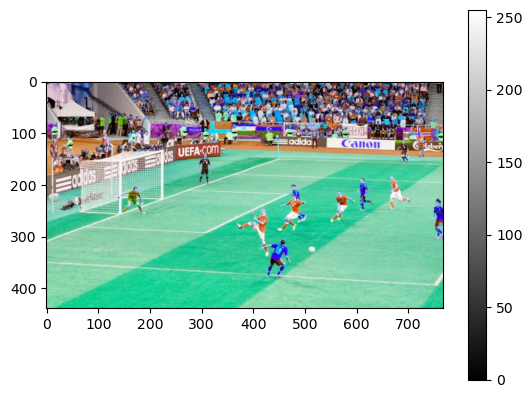

In [45]:
plt.imshow(img, cmap='gray')
plt.colorbar();

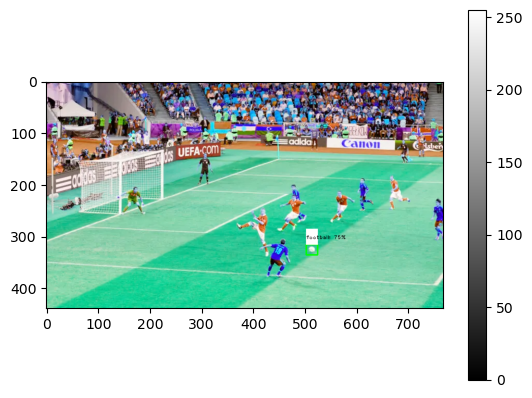

In [46]:
plt.imshow(image, cmap='gray')
plt.colorbar();